In [32]:
import math
import sys
import matplotlib.pyplot as plt

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, plot_ratings_mses_s3, s3_load_trial
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import *
from reclab.recommenders import TopPop


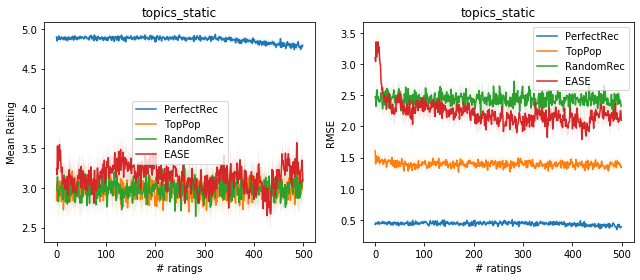

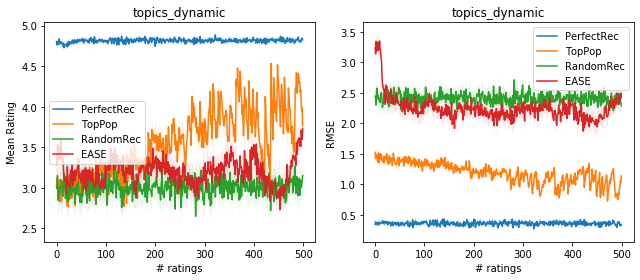

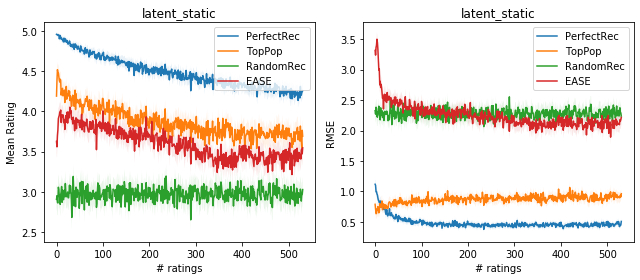

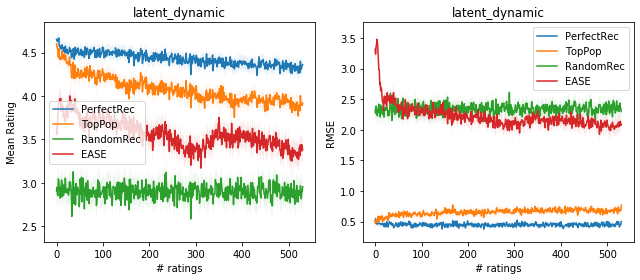

ClientError: An error occurred (403) when calling the HeadObject operation: Forbidden

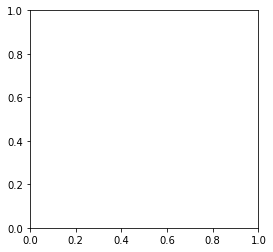

In [33]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_names = ['topics_static', 'topics_dynamic', 'latent_static', 'latent_dynamic'] + \
            ['topics_static_small', 'topics_dynamic_small', 'latent_static_small', 'latent_dynamic_small']
recommender_names = ['PerfectRec', 'TopPop', 'RandomRec', 'EASE']

for env_name in env_names:

    if env_name == 'topics_static':
        ENV_PARAMS = TOPICS_STATIC
    elif env_name == 'topics_dynamic':
        ENV_PARAMS = TOPICS_DYNAMIC
    elif env_name == 'latent_static':
        ENV_PARAMS = LATENT_STATIC
    elif env_name == 'latent_dynamic':
        ENV_PARAMS = LATENT_DYNAMIC
    elif env_name == 'topics_static_small':
        ENV_PARAMS = TOPICS_STATIC_SMALL
    elif env_name == 'topics_dynamic_small':
        ENV_PARAMS = TOPICS_DYNAMIC_SMALL
    elif env_name == 'latent_static_small':
        ENV_PARAMS = LATENT_STATIC_SMALL
    elif env_name == 'latent_dynamic_small':
        ENV_PARAMS = LATENT_DYNAMIC_SMALL
    else:
        assert False, "environment not implemented!"


    # Experiment setup.
    n_trials = 1
    trial_seeds = [i for i in range(n_trials)]
    num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']
    len_trial = get_len_trial(ENV_PARAMS)
    num_users = ENV_PARAMS['params']['num_users']

    environment_name = ENV_PARAMS['name']
    env_name = ENV_PARAMS['name']

    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=False,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    

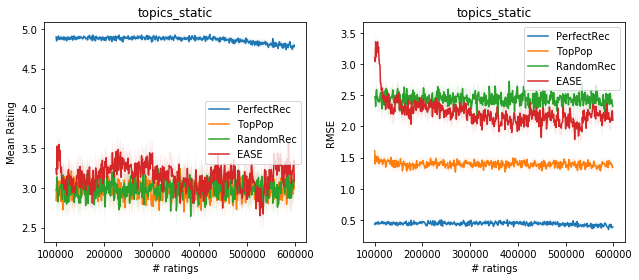

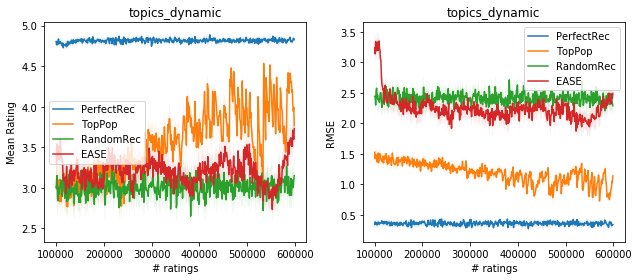

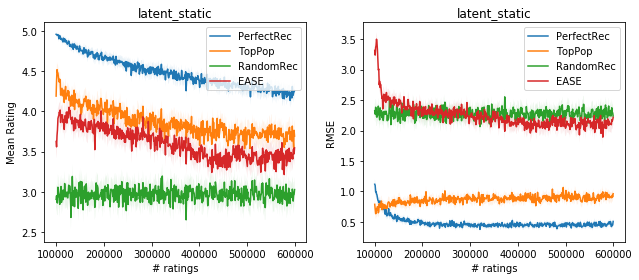

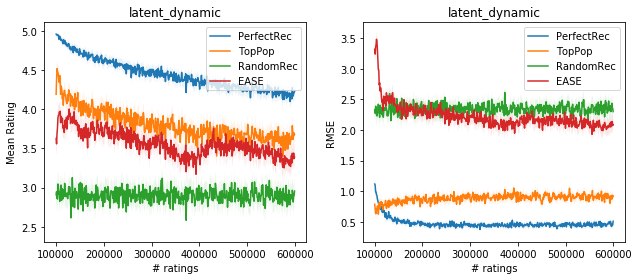

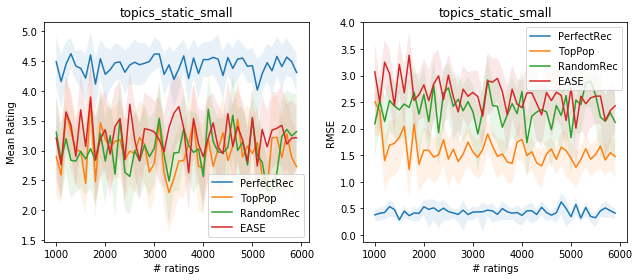

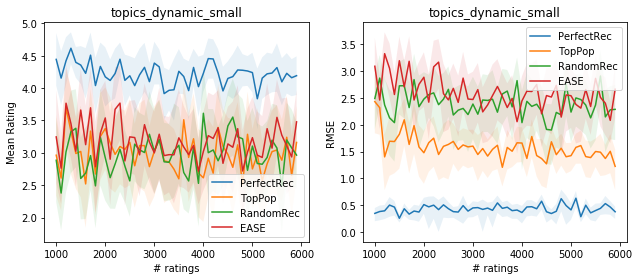

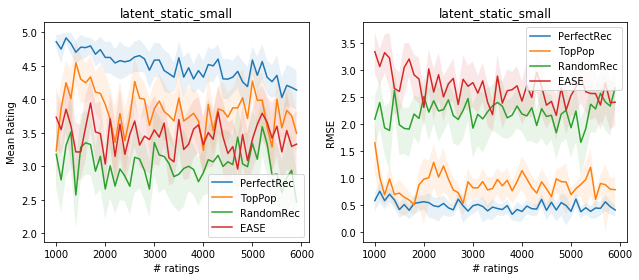

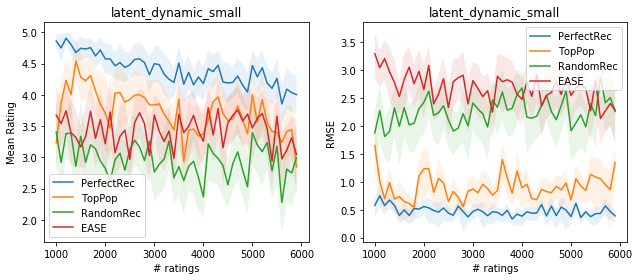

# Targetted rating investigation

In [6]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_name = 'topics_static'
rec_name = 'PerfectRec'

seed = 0

bucket = boto3.resource('s3').Bucket(bucket_name)
dir_name = s3_experiment_dir_name(data_dir, env_name, rec_name, seed)

res = s3_load_trial(bucket, dir_name, load_dense=True)
rec_hyperparameters, ratings, predictions, dense_ratings, dense_predictions, env_snapshots = res

In [14]:
dense_predictions.shape

(500, 1700000)

In [18]:
ratings = ratings[np.newaxis, np.newaxis, :, :]
predictions = predictions[np.newaxis, np.newaxis, :, :]
dense_ratings = dense_ratings[np.newaxis, np.newaxis, :, :]
dense_predictions = dense_predictions[np.newaxis, np.newaxis, :, :]

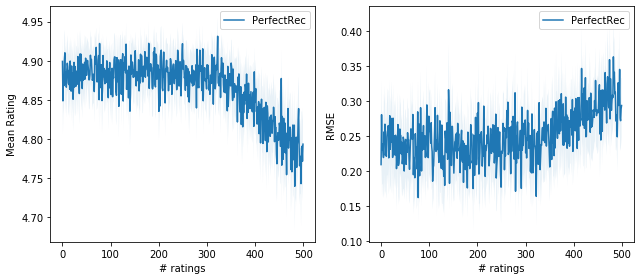

In [28]:
plot_ratings_mses(ratings,
                      np.clip(predictions, 1, 5),
                      [rec_name])

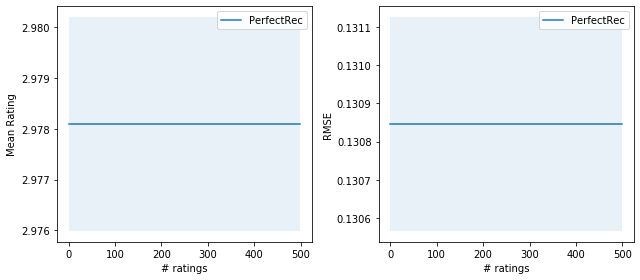

In [21]:
plot_ratings_mses(dense_ratings,
                      dense_predictions,
                      [rec_name])

(array([89524500., 87268000., 84615500., 83790000., 86334000., 85959500.,
        80444500., 82568000., 83908000., 85588000.]),
 array([0.50036225, 1.000315  , 1.50026775, 2.0002205 , 2.50017325,
        3.000126  , 3.50007875, 4.00003151, 4.49998426, 4.99993701,
        5.49988976]),
 <a list of 10 Patch objects>)

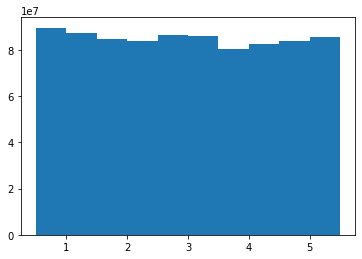

In [23]:
plt.figure()
plt.hist(dense_predictions.flatten())

(array([   58.,   176.,   461.,   793.,  2404.,  3884.,  7128., 14782.,
        26378., 43936.]),
 array([3.7026507 , 3.88237461, 4.06209852, 4.24182242, 4.42154633,
        4.60127023, 4.78099414, 4.96071804, 5.14044195, 5.32016585,
        5.49988976]),
 <a list of 10 Patch objects>)

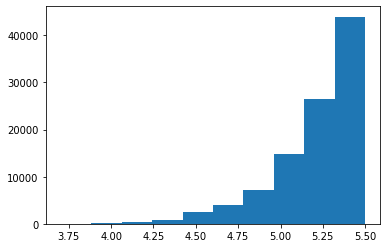

In [24]:
plt.figure()
plt.hist(predictions.flatten())

(array([1.0000e+00, 6.0000e+00, 1.5000e+01, 7.4000e+01, 2.9200e+02,
        8.2400e+02, 2.2500e+03, 5.1770e+03, 9.8550e+03, 8.1506e+04]),
 array([2.18677833, 2.46810049, 2.74942266, 3.03074483, 3.312067  ,
        3.59338916, 3.87471133, 4.1560335 , 4.43735567, 4.71867783,
        5.        ]),
 <a list of 10 Patch objects>)

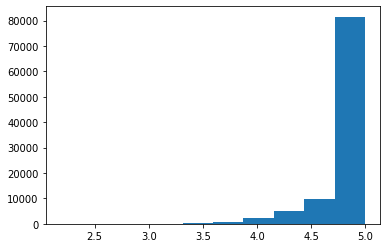

In [25]:
plt.figure()
plt.hist(ratings.flatten())